In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("sqisland.csv", delimiter=",", skiprows=1, usecols=range(2, 9))
# print(data[0,:])

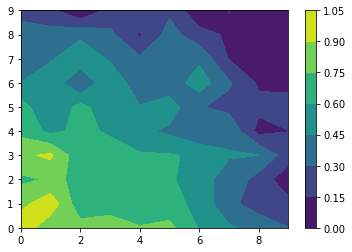

In [ ]:
# Reshape the Gene 1 column into a 10x10 array matching the map:
Z2 = np.reshape(data[:, 0], [10, 10], order="C")
plt.contourf(Z2)
plt.colorbar()